# HW02 (due October 12th)

In this homework you will investigate the *causal* of being part of a union on the number of hours worked. You will work with data from the National Longitudinal Survey. In particular, you have a panel of young women who were between 14 and 26 years of age in 1968, surveyed for 20 years.

The purpose of this homework is ot make you think about the **identification** assumptions underlying your empirical strategy, namely the assumptions that allow the coefficient estimate from the regressions to be causal. Throughout the homework you will try to address the issue of **omitted variable bias** through different strategies, that will allow to make milder identification assumptions.

# Load Data

In [2]:
##Load the NLSY dataset
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np

data = pd.read_stata('https://www.stata-press.com/data/r16/nlswork.dta')

#  Summary statistics

Inspect the data.

In [3]:
##Visualize the dataset
data

,idcode,year,birth_yr,age,race,msp,nev_mar,grade,collgrad,not_smsa,...,south,ind_code,occ_code,union,wks_ue,ttl_exp,tenure,hours,wks_work,ln_wage
0,1,70,51,18.0,black,0.0,1.0,12.0,0,0.0,...,0.0,6.0,3.0,NaN,2.0,1.083333,0.083333,20.0,27.0,1.451214
1,1,71,51,19.0,black,1.0,0.0,12.0,0,0.0,...,0.0,4.0,6.0,NaN,22.0,1.275641,0.083333,44.0,10.0,1.028620
2,1,72,51,20.0,black,1.0,0.0,12.0,0,0.0,...,0.0,4.0,6.0,1.0,0.0,2.256410,0.916667,40.0,51.0,1.589977
3,1,73,51,21.0,black,1.0,0.0,12.0,0,0.0,...,0.0,4.0,6.0,NaN,0.0,2.314102,0.083333,40.0,3.0,1.780273
4,1,75,51,23.0,black,1.0,0.0,12.0,0,0.0,...,0.0,5.0,6.0,NaN,0.0,2.775641,0.166667,10.0,24.0,1.777012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28529,5159,80,44,35.0,black,0.0,0.0,12.0,0,0.0,...,1.0,11.0,3.0,1.0,NaN,5.000000,5.000000,39.0,98.0,1.784807
28530,5159,82,44,37.0,black,0.0,0.0,12.0,0,0.0,...,1.0,11.0,3.0,0.0,NaN,7.000000,7.000000,38.0,98.0,1.871802
28531,5159,83,44,38.0,black,0.0,0.0,12.0,0,0.0,...,1.0,11.0,3.0,1.0,0.0,8.076923,8.000000,38.0,56.0,1.843853
28532,5159,85,44,40.0,black,0.0,0.0,12.0,0,0.0,...,1.0,11.0,3.0,1.0,0.0,9.076923,0.000000,40.0,52.0,1.799792


In [4]:
data.describe()

,idcode,year,birth_yr,age,msp,nev_mar,grade,collgrad,not_smsa,c_city,south,ind_code,occ_code,union,wks_ue,ttl_exp,tenure,hours,wks_work,ln_wage
count,28534.000000,28534.000000,28534.000000,28510.000000,28518.000000,28518.000000,28532.000000,28534.000000,28526.000000,28526.000000,28526.000000,28193.000000,28413.000000,19238.000000,22830.000000,28534.000000,28101.000000,28467.000000,27831.000000,28534.000000
mean,2601.284292,77.958646,48.085091,29.045107,0.602917,0.229680,12.532595,0.168045,0.282444,0.357218,0.409556,7.692973,4.777672,0.234432,2.548095,6.215316,3.123836,36.559560,53.989328,1.674907
std,1487.358947,6.383879,3.012837,6.700584,0.489302,0.420634,2.323905,0.373913,0.450196,0.479188,0.491761,2.994025,3.065435,0.423654,7.294463,4.652117,3.751409,9.869623,29.032325,0.478093
min,1.000000,68.000000,41.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1327.000000,72.000000,46.000000,23.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,5.000000,3.000000,0.000000,0.000000,2.461539,0.500000,35.000000,36.000000,1.361496
50%,2606.000000,78.000000,48.000000,28.000000,1.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,7.000000,3.000000,0.000000,0.000000,5.057693,1.666667,40.000000,52.000000,1.640541
75%,3881.000000,83.000000,51.000000,34.000000,1.000000,0.000000,14.000000,0.000000,1.000000,1.000000,1.000000,11.000000,6.000000,0.000000,0.000000,9.128204,4.166667,40.000000,72.000000,1.964083
max,5159.000000,88.000000,54.000000,46.000000,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,1.000000,12.000000,13.000000,1.000000,76.000000,28.884615,25.916666,168.000000,104.000000,5.263916


In [5]:
##tabulate college and union status
tab = data[["idcode",  "year", "collgrad", "union"]]
tab.head()

,idcode,year,collgrad,union
0,1,70,0,NaN
1,1,71,0,NaN
2,1,72,0,1.0
3,1,73,0,NaN
4,1,75,0,NaN


In [6]:
##generate a variable for log hours worked
x = data["hours"].apply(lambda x: np.log(x))

In [7]:
##plot log hours against year separately for union and non-union
import seaborn as sns

df = pd.DataFrame(columns=["Union", "LogHours", "Year"])
df["LogHours"] = x
df["Union"] = data["union"]
df["Year"] = data["year"]
df.head()

,Union,LogHours,Year
0,NaN,2.995732,70
1,NaN,3.784190,71
2,1.0,3.688879,72
3,NaN,3.688879,73
4,NaN,2.302585,75


<Axes: xlabel='Year', ylabel='LogHours'>

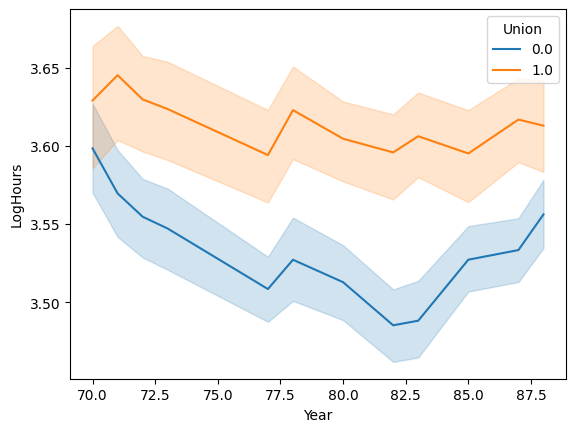

In [8]:
# Create the line plot
sns.lineplot(data=df, x="Year", y="LogHours", hue="Union")

# Regression: Effect of union status on hours worked

In [9]:
def print_results(res):
    print("Coefficient on Union:\n", res.params["Union"], "\n")
    print("Standard error:\n", res.bse["Union"], "\n")
    print("T-stat:\n", res.tvalues["Union"], "\n")
    print("P-value:\n", res.pvalues["Union"], "\n")
    print("Confidence interval:\n", res.conf_int(), "\n")

In [10]:
##Regress hours worked against union status and display the results
res = smf.ols(formula='LogHours ~ Union', data=df).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               LogHours   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     147.5
Date:                Mon, 23 Oct 2023   Prob (F-statistic):           8.08e-34
Time:                        15:18:10   Log-Likelihood:                -9865.7
No. Observations:               19202   AIC:                         1.974e+04
Df Residuals:                   19200   BIC:                         1.975e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5270      0.003   1057.147      0.0

In [11]:
##Print or write out the coefficient on union, standard error, t-stat, p-value and confidence interval
print_results(res)

Coefficient on Union:
 0.08367760290119028 

Standard error:
 0.006889656027150657 

T-stat:
 12.145396311722209 

P-value:
 8.075661979922033e-34 

Confidence interval:
                   0         1
Intercept  3.520504  3.533583
Union      0.070173  0.097182 



#### What is the identification assumption for the coefficient on union to be causal?

The identification assumption for the coefficient on union to be causal is exogeniety. Which implies that union membership should be independent of the unobserved confounders.

In [12]:
## add education (collgrad) to the regression and compare the coefficient on union with the previous result
df["collgrad"] = data["collgrad"]
res = smf.ols(formula='LogHours ~ Union + C(collgrad)', data=df).fit()
print_results(res)

Coefficient on Union:
 0.08062868330053492 

Standard error:
 0.0068975872842296365 

T-stat:
 11.689403841960953 

P-value:
 1.845786522544503e-31 

Confidence interval:
                          0         1
Intercept         3.511228  3.525298
C(collgrad)[T.1]  0.034117  0.063002
Union             0.067109  0.094149 



**Comparison:** The results for Union with and without collgrad are very similar with slightly changes.

In [15]:
## add occupation codes to the regression and compare the results with the previous one
df["occ_code"] = data["occ_code"]
res = smf.ols(formula='LogHours ~ Union + C(occ_code)', data=df).fit()
print_results(res)

Coefficient on Union:
 0.05412562414785915 

Standard error:
 0.0069415474872542935 

T-stat:
 7.797342631054789 

P-value:
 6.6453965712506e-15 

Confidence interval:
                             0         1
Intercept            3.510812  3.542894
C(occ_code)[T.2.0]   0.135792  0.189222
C(occ_code)[T.3.0]  -0.003022  0.033277
C(occ_code)[T.4.0]  -0.216633 -0.152740
C(occ_code)[T.5.0]   0.081679  0.171668
C(occ_code)[T.6.0]   0.071392  0.115111
C(occ_code)[T.7.0]  -0.612478 -0.515505
C(occ_code)[T.8.0]  -0.126340 -0.082553
C(occ_code)[T.9.0]  -0.630353  0.254524
C(occ_code)[T.10.0] -0.077492  0.131479
C(occ_code)[T.11.0] -0.043790  0.105773
C(occ_code)[T.12.0] -0.191650  0.494053
C(occ_code)[T.13.0]  0.043310  0.096876
Union                0.040520  0.067732 



**Comparison:** The results now (with occ_code) are different than before (Union and Union + collgrad). The coefficient, std error and t-stat are higher. The confidence interval is also wider.

#### In terms of causal inference, why is adding occupation code as a control probably not a good idea?
**Answer:**
Occupation can be seen as a potential mediator in the relationship between union status and worked hours. Union membership may influence the type of occupation a person has, and different occupations may have varying working hour expectations.

=> It is a collider

#### What are "good controls" in the dataset in terms of being exogenous to union status?
**Answer:** For the Union Status to be exogenous, we need to control confounders. Good controls could be: Age, Education, Industry, Gender, Marital Status.

In [61]:
##add these controls to the regression
df["age"] = data["age"]
df["c_city"] = data["c_city"]
df["collgrad"] = data["collgrad"]
res = smf.ols(formula='LogHours ~ Union + age + c_city + collgrad', data=df).fit()
print_results(res)

Coefficient on Union:
 0.07940259091096978 

Standard error:
 0.006910031872209868 

T-stat:
 11.490915292345298 

P-value:
 1.8436818278043627e-30 

Confidence interval:
                   0         1
Intercept  3.579993  3.640566
Union      0.065858  0.092947
age       -0.004160 -0.002296
c_city     0.012646  0.036901
collgrad   0.039106  0.068128 



#### How do these change your estimates?
**Answer**: A lower coef, which indicates that the estimated effect of union on worked hours becomes lower after controlling for confounders. 

# Short Essay: Correlation/Causation

**Find a news article mistaking correlation for causation. Link to the article and write a short paragraph explaining the mistake.**

[type your comments here, or attach as separate document.]

Link to the article: https://helda.helsinki.fi/server/api/core/bitstreams/8595a86b-94f8-4960-8585-c19a46cbb54d/content

The study suggests a correlation between male organ size and economic growth, discovering patterns like an inverse U-shaped relationship between 1985 per capita GDP and penile length. However, it mistakenly infers causation from these correlations without providing a rigorous causal mechanism or accounting for potential lurking variables. The paper acknowledges the need for more data and elaborate methods to test this unconventional hypothesis, exemplifying a cautious approach towards establishing causation from observed correlations.